# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *K*

**Names:**

* *Robin Lang*
* *Kim Lan Phan Hoang*
* *Julien Harbulot*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [1]:
import epidemics_helper
import json

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import networkx as nx
from networkx.readwrite import json_graph

In [11]:
file = open("../data/nyc_augmented_network.json")
file_json = json.load(file)
G = json_graph.node_link_graph(file_json)

sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100.0)

print("---")
node_id = 0
print('Node: ', node_id)
print('Infection time: ', sir.inf_time[node_id]) 
print('Recovery time: ', sir.rec_time[node_id])

Epidemic stopped after 100.55 days | 100.55 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered
---
Node:  0
Infection time:  5.64817514096
Recovery time:  15.5941130274


NameError: name 'num_nodes' is not defined

In [32]:
inf = sir.inf_time
rec = sir.rec_time
nodes = nx.number_of_nodes(G)

def infected(t):
    ret = 0
    for i in range(nodes):
        if inf[i] < t:
            ret += 1
        if rec[i] < t:
            ret -= 1
    return ret

def susceptible(t):
    ret = 0
    for i in range(nodes):
        if inf[i] > t:
            ret += 1
    return ret

def recovered(t):
    ret = 0
    for i in range(nodes):
        if rec[i] < t:
            ret += 1
    return ret

graph_points = 500

X = np.arange(0, 100, 100/graph_points)
INF = np.zeros(graph_points)
SUSC = np.zeros(graph_points)
REC = np.zeros(graph_points)
for i in range(graph_points):
    INF[i] = infected(X[i])
    SUSC[i] = susceptible(X[i])
    REC[i] = recovered(X[i])

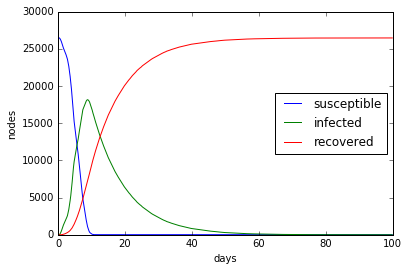

In [33]:
plt.plot(X, SUSC, label="susceptible")
plt.plot(X, INF, label="infected")
plt.plot(X, REC, label="recovered")
plt.legend(loc='center right', frameon=True)
plt.xlabel("days")
plt.ylabel("nodes")
plt.show()

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

#### Exercise 2.11: Strategy 2